<a href="https://colab.research.google.com/github/NguyenSang2003/Machine-Learning/blob/main/Lab_4_21130512_NguyenVanSang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to deal with **Logistic Regression**, **kNN**, and **Decision Tree** alogirthms applied to classification tasks.

*   **Deadline: 23:59, 01/04/2024**



# Import libraries

In [23]:
# code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from prettytable import PrettyTable
from sklearn.tree import DecisionTreeClassifier

#Task 1.
Apply **LogisticRegression** to iris dataset to classify species of iris based on sepal_length (chiều dài đài hoa), sepal_width, petal_length (chiều dài cánh hoa), petal_width. The species are '**setosa**' '**versicolor**' and '**virginica**'.



```
from sklearn import datasets
data1 = datasets.load_iris()
```




In [ ]:
from sklearn import datasets
# Tải tập dữ liệu iris
data = datasets.load_iris()
X = data.data
y = data.target

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo và huấn luyện mô hình Logistic Regression
classifier = LogisticRegression(max_iter=1000, random_state=0)
classifier.fit(X_train, y_train)

# Kiểm tra mô hình
y_pred = classifier.predict(X_test)

# Tính độ chính xác
accuracy = (y_pred == y_test).mean()
print("Độ chính xác:", accuracy)

Độ chính xác: 1.0


#Task 2.
Apply LogisticRegression to **FASHION** dataset (*fashion_train.csv* and *fashion_test.csv*) which aims at classifying 10 fashion categories. Dataset includes 784 pixels values of images (28x28). This pixel-value is an integer between 0 and 255. Each training and test example is assigned to one of the following labels:

*   0 T-shirt/top
*   1 Trouser
*   2 Pullover
*   3 Dress
*   4 Coat
*   5 Sandal
*   6 Shirt
*   7 Sneaker
*   8 Bag
*   9 Ankle boot

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Data_Labs_ML/Lab4'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Data_Labs_ML/Lab4


In [3]:
# Đọc dữ liệu từ tập train và test
train_data = pd.read_csv("fashion_train.csv")
test_data = pd.read_csv("fashion_test.csv")

# In ra tên của tất cả các cột trong tập dữ liệu train và test
# Để biết được cột nhãn là cột y
print("Tên các cột trong tập dữ liệu train:")
print(train_data.columns)

print("\nTên các cột trong tập dữ liệu test:")
print(test_data.columns)


Tên các cột trong tập dữ liệu train:
Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       ...
       'V776', 'V777', 'V778', 'V779', 'V780', 'V781', 'V782', 'V783', 'V784',
       'y'],
      dtype='object', length=785)

Tên các cột trong tập dữ liệu test:
Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       ...
       'V776', 'V777', 'V778', 'V779', 'V780', 'V781', 'V782', 'V783', 'V784',
       'y'],
      dtype='object', length=785)


In [6]:
# Tách đặc trưng và nhãn từ tập dữ liệu train
X_train = train_data.drop('y', axis=1)
y_train = train_data['y']

# Tách đặc trưng và nhãn từ tập dữ liệu test
X_test = test_data.drop('y', axis=1)
y_test = test_data['y']

# Tạo và huấn luyện mô hình Logistic Regression
classifier = LogisticRegression(max_iter=1000, random_state=0)
classifier.fit(X_train, y_train)

# Dự đoán nhãn cho dữ liệu kiểm tra
y_pred = classifier.predict(X_test)

# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình Logistic Regression trên tập kiểm tra:", accuracy)

Độ chính xác của mô hình Logistic Regression trên tập kiểm tra: 0.783


#Task 3.
Apply another classification algorithm named **kNN**, which is an instance classifcation model.
*  3.1. Perform kNN algorithm to Iris dataset with k={3, 5, …, 29}. Select the best value of k. Plot the values of **accuracy, precision, recall, f1 measure** metrics with different values of k.

*   3.2. Then compare the obtained results with those using Logistic regression (based on metrics: **accuracy, precision, recall, f1 measure**) using **PrettyTable**.


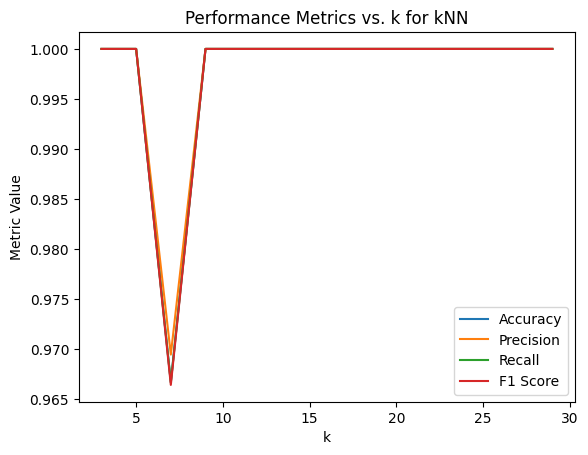

Best k value: 3


In [8]:
# Khởi tạo danh sách lưu các giá trị k và các metric tương ứng
k_values = list(range(3, 30, 2))
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Lặp qua các giá trị k
for k in k_values:
    # Tạo và huấn luyện mô hình kNN
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    # Dự đoán nhãn cho dữ liệu kiểm tra
    y_pred = knn_model.predict(X_test)

    # Tính toán các metric
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Lưu các metric vào danh sách
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Vẽ đồ thị các metric theo giá trị k
plt.plot(k_values, accuracies, label='Accuracy')
plt.plot(k_values, precisions, label='Precision')
plt.plot(k_values, recalls, label='Recall')
plt.plot(k_values, f1_scores, label='F1 Score')
plt.xlabel('k')
plt.ylabel('Metric Value')
plt.title('Performance Metrics vs. k for kNN')
plt.legend()
plt.show()

# Tìm giá trị k tốt nhất
best_k = k_values[accuracies.index(max(accuracies))]
print("Best k value:", best_k)

In [9]:
# Tạo bảng
table = PrettyTable()
table.field_names = ["Algorithm", "Accuracy", "Precision", "Recall", "F1 Score"]

# Thêm kết quả của kNN
table.add_row(["kNN (k={})".format(best_k), accuracies[k_values.index(best_k)],
                precisions[k_values.index(best_k)], recalls[k_values.index(best_k)],
                f1_scores[k_values.index(best_k)]])

# Tạo và huấn luyện mô hình Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, random_state=0)
logistic_model.fit(X_train, y_train)

# Dự đoán nhãn cho dữ liệu kiểm tra
y_pred_logistic = logistic_model.predict(X_test)

# Tính toán các metric cho Logistic Regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic, average='weighted')
recall_logistic = recall_score(y_test, y_pred_logistic, average='weighted')
f1_logistic = f1_score(y_test, y_pred_logistic, average='weighted')

# Thêm kết quả của Logistic Regression vào bảng
table.add_row(["Logistic Regression", accuracy_logistic, precision_logistic,
                recall_logistic, f1_logistic])

# In bảng
print(table)


+---------------------+----------+-----------+--------+----------+
|      Algorithm      | Accuracy | Precision | Recall | F1 Score |
+---------------------+----------+-----------+--------+----------+
|      kNN (k=3)      |   1.0    |    1.0    |  1.0   |   1.0    |
| Logistic Regression |   1.0    |    1.0    |  1.0   |   1.0    |
+---------------------+----------+-----------+--------+----------+


#Task 4.
Similar to Task 3, apply kNN algorithm to **FASHION** dataset which included in datasets of sklearn API.
*  4.1.	Perform kNN algorithm to Iris dataset with k={3, 5, …, 29}. Select the best value of k. Plot the values of **accuracy, precision, recall, f1 measure** metrics with different values of k.
*  4.2.	Plot the values of **accuracy, precision, recall, f1 measure** metrics with different values of k.
*  4.3.	Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


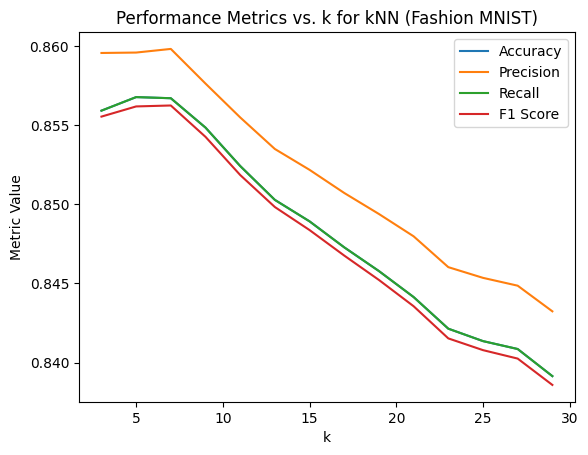

In [13]:
# 4.1
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Thực hiện thuật toán kNN với các giá trị k từ 3 đến 29
k_values = list(range(3, 30, 2))
accuracies = []
precisions = []
recalls = []
f1_scores = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Vẽ đồ thị các metric theo giá trị k
plt.plot(k_values, accuracies, label='Accuracy')
plt.plot(k_values, precisions, label='Precision')
plt.plot(k_values, recalls, label='Recall')
plt.plot(k_values, f1_scores, label='F1 Score')
plt.xlabel('k')
plt.ylabel('Metric Value')
plt.title('Performance Metrics vs. k for kNN (Fashion MNIST)')
plt.legend()
plt.show()

In [15]:
# 4.2
# Tìm giá trị k tốt nhất
best_k = k_values[accuracies.index(max(accuracies))]
print("Best k:", best_k)

Best k: 5


In [19]:
# 4.3
# Thực hiện Logistic Regression
logistic_model = LogisticRegression(max_iter=1500, random_state=0)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Tính toán các metric cho Logistic Regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic, average='weighted')
recall_logistic = recall_score(y_test, y_pred_logistic, average='weighted')
f1_logistic = f1_score(y_test, y_pred_logistic, average='weighted')

# In kết quả
table = PrettyTable()
table.field_names = ["Algorithm", "Accuracy", "Precision", "Recall", "F1 Score"]
table.add_row(["kNN (k={})".format(best_k), accuracies[k_values.index(best_k)],
               precisions[k_values.index(best_k)], recalls[k_values.index(best_k)],
               f1_scores[k_values.index(best_k)]])
table.add_row(["Logistic Regression", accuracy_logistic, precision_logistic,
               recall_logistic, f1_logistic])
print(table)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


+---------------------+--------------------+--------------------+--------------------+--------------------+
|      Algorithm      |      Accuracy      |     Precision      |       Recall       |      F1 Score      |
+---------------------+--------------------+--------------------+--------------------+--------------------+
|      kNN (k=5)      | 0.8567857142857143 | 0.859602313718844  | 0.8567857142857143 | 0.8561956157669488 |
| Logistic Regression | 0.8400714285714286 | 0.8388959754939834 | 0.8400714285714286 | 0.8389951066274643 |
+---------------------+--------------------+--------------------+--------------------+--------------------+


#Task 5.
Compare the performance of selected classification algorithms (**Decision Tree, kNN, and Logistic Regression**) to ***spam detection***. The dataset can be accessed from the link: http://archive.ics.uci.edu/ml/datasets/Spambase
Attribute Information:
The last column of 'spambase.csv denotes whether the e-mail was considered **spam (1) or not (0)**, i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes:
*  **48 continuous real [0,100] attributes** of type word_freq_WORD
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. **Example**: word_freq_address: percentage of words in the e-mail that match ADDRESS.
*  **6 continuous real [0,100] attributes** of type char_freq_CHAR]
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail
*  **1 continuous real [1,...] attribute** of type capital_run_length_average
= average length of uninterrupted sequences of capital letters
*  **1 continuous integer [1,...] attribute** of type capital_run_length_longest
= length of longest uninterrupted sequence of capital letters
*  **1 continuous integer [1,...] attribute** of type capital_run_length_total = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail
*  **1 nominal {0,1} class attribute** of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.


---


In order to compare the performance of selected algorithms, some common metrics including **accuracy, precision, recall, f1 measures** could be used.


In [24]:
print(data.columns)

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [25]:
# Đọc dữ liệu từ tập tin 'spambase.csv'
data = pd.read_csv("spambase.csv")

# Chuẩn bị dữ liệu
X = data.drop('class', axis=1)
y = data['class']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện các mô hình
decision_tree = DecisionTreeClassifier(random_state=0)
knn = KNeighborsClassifier()
logistic_regression = LogisticRegression(max_iter=2000, random_state=0)

decision_tree.fit(X_train, y_train)
knn.fit(X_train, y_train)
logistic_regression.fit(X_train, y_train)

# Đánh giá hiệu suất của các mô hình
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

decision_tree_results = evaluate_model(decision_tree, X_test, y_test)
knn_results = evaluate_model(knn, X_test, y_test)
logistic_regression_results = evaluate_model(logistic_regression, X_test, y_test)

# In kết quả sử dụng PrettyTable
table = PrettyTable()
table.field_names = ["Algorithm", "Accuracy", "Precision", "Recall", "F1 Score"]
table.add_row(["Decision Tree", *decision_tree_results])
table.add_row(["kNN", *knn_results])
table.add_row(["Logistic Regression", *logistic_regression_results])
print(table)

+---------------------+--------------------+--------------------+--------------------+--------------------+
|      Algorithm      |      Accuracy      |     Precision      |       Recall       |      F1 Score      |
+---------------------+--------------------+--------------------+--------------------+--------------------+
|    Decision Tree    | 0.9142236699239956 | 0.9146666666666666 | 0.8794871794871795 | 0.8967320261437908 |
|         kNN         | 0.7904451682953312 | 0.7743732590529248 | 0.7128205128205128 | 0.7423230974632844 |
| Logistic Regression | 0.9218241042345277 | 0.9297297297297298 | 0.882051282051282  | 0.9052631578947369 |
+---------------------+--------------------+--------------------+--------------------+--------------------+


In [ ]:
from prettytable import PrettyTable

# These 3 are the columns of the tables
t = PrettyTable(['Subject Code', 'Subject', 'Marks'])

# To insert rows:
t.add_row(['K01', 'Maths', 95])
t.add_row(['K04', 'Physics', 89])
t.add_row(['K03', 'Chemistry', 92])
t.add_row(['K08', 'English', 91])
t.add_row(['K29', 'Computer Science', 99])
t.add_row(['K06', 'Social Science', 86])

print(t)

+--------------+------------------+-------+
| Subject Code |     Subject      | Marks |
+--------------+------------------+-------+
|     K01      |      Maths       |   95  |
|     K04      |     Physics      |   89  |
|     K03      |    Chemistry     |   92  |
|     K08      |     English      |   91  |
|     K29      | Computer Science |   99  |
|     K06      |  Social Science  |   86  |
+--------------+------------------+-------+


#Finally,
Save a copy in your Github. Remember renaming the notebook.